In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

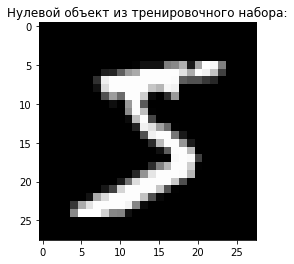

In [17]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

In [18]:
dim = 784 # 28*28
X_train = X_train.reshape(len(X_train), dim)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=44, svd_solver='full')
modelPCA = pca.fit(X_train)
print(np.cumsum(pca.explained_variance_ratio_))
X_train = modelPCA.transform(X_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=45)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [ ]:
svm = SVC()
clf = svm.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
SVC_M = confusion_matrix(y_test, y_pred)
SVC_M

In [ ]:
clf = neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test)
KNN_M = confusion_matrix(y_test, y_pred)
KNN_M

In [ ]:
SVC_M - KNN_M

In [ ]:
for i in range(10):
    print("точность " + str(i) + " \t SVM = " + str(SVC_M[i][i] / np.sum(SVC_M[i])) + " \t KNN = " + str(KNN_M[i][i] / np.sum(KNN_M[i])))